In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df = pd.read_csv('Supermart_Grocery_Sales.csv')

In [37]:
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [39]:
df.shape

(9994, 11)

In [40]:
df.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, format='mixed')

In [42]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [43]:
df['Year'] = df["Order Date"].dt.year
df['Month'] = df['Order Date'].dt.month

In [44]:
df['Year'].unique()

array([2017, 2016, 2015, 2018], dtype=int32)

In [45]:
df['Month'].unique()

array([ 8, 12, 11,  9,  4,  5,  7,  1, 10,  6,  3,  2], dtype=int32)

In [46]:
df.describe(include = "all")

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000
unique,9994,50,7,23,24,NaN,5,NaN,NaN,NaN,1,NaN,NaN
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,NaN,West,NaN,NaN,NaN,Tamil Nadu,NaN,NaN
freq,1,227,1514,719,459,NaN,3203,NaN,NaN,NaN,9994,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2017-04-11 12:33:42.973784064,NaN,1496.596158,0.226817,374.937082,NaN,2016.722233,7.174605
min,NaN,NaN,NaN,NaN,NaN,2015-01-02 00:00:00,NaN,500.000000,0.100000,25.250000,NaN,2015.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2016-05-01 00:00:00,NaN,1000.000000,0.160000,180.022500,NaN,2016.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,2017-05-30 00:00:00,NaN,1498.000000,0.230000,320.780000,NaN,2017.000000,8.000000
75%,NaN,NaN,NaN,NaN,NaN,2018-04-09 00:00:00,NaN,1994.750000,0.290000,525.627500,NaN,2018.000000,10.000000
max,NaN,NaN,NaN,NaN,NaN,2018-12-30 00:00:00,NaN,2500.000000,0.350000,1120.950000,NaN,2018.000000,12.000000


## There is no null values or wrong data types for our column

# 1 Sales Trends

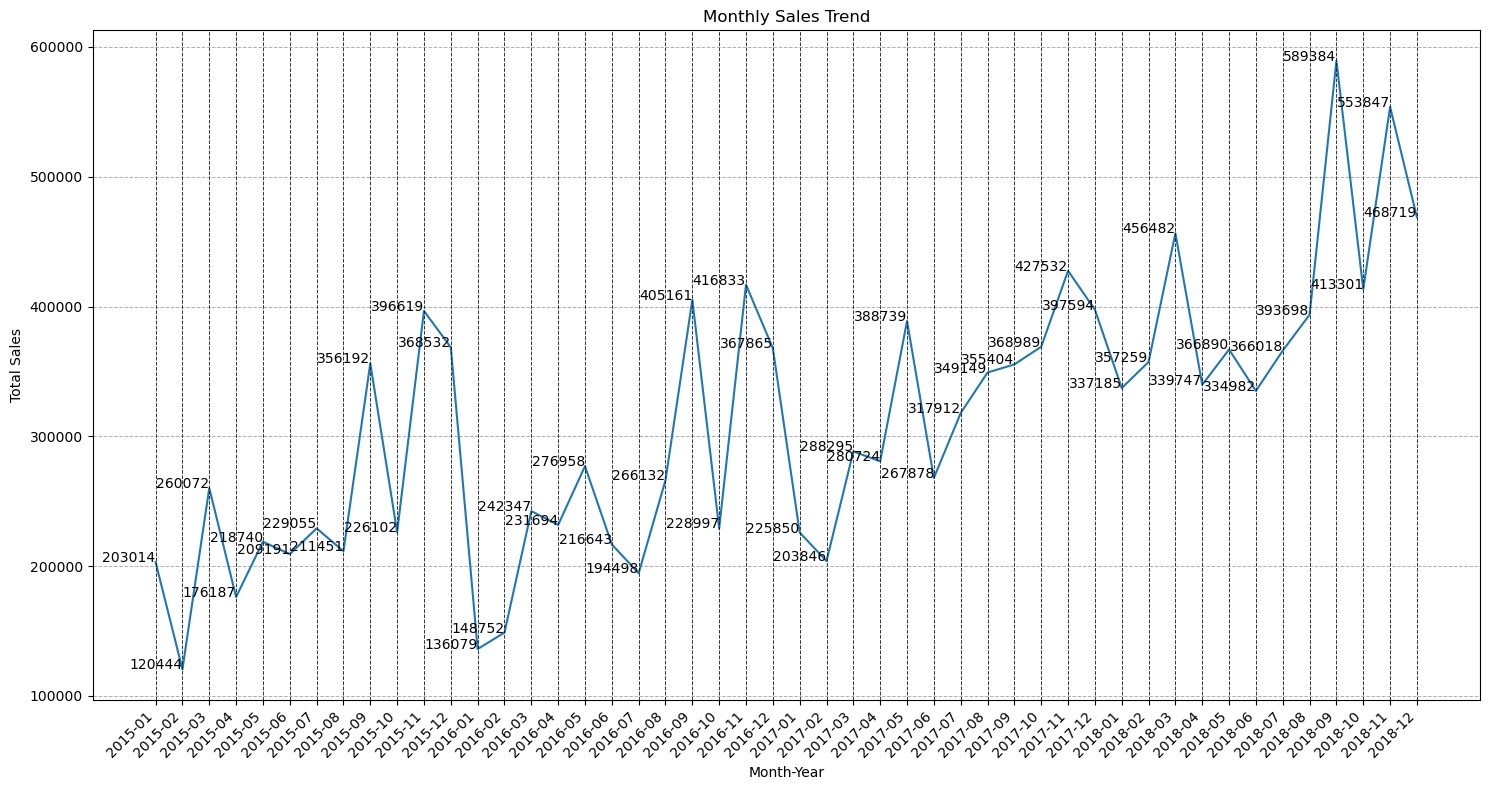

In [47]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by YearMonth and sum Sales
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Plot the sales trends
plt.figure(figsize=(15, 8))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha="right")

# Annotating each point with its sales value
for i, row in monthly_sales.iterrows():
    plt.text(row['YearMonth'], row['Sales'], f'{row["Sales"]}', ha='right')
    plt.axvline(x=row['YearMonth'], color='black', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# 2 Total Sales By Region

In [48]:
region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales'],
                        aggfunc={'Order ID': 'count', 'Sales': 'sum'}).reset_index().sort_values(by='Sales', ascending=False)

region

,Region,Order ID,Sales
4,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
3,South,1619,2440461
2,North,1,1254


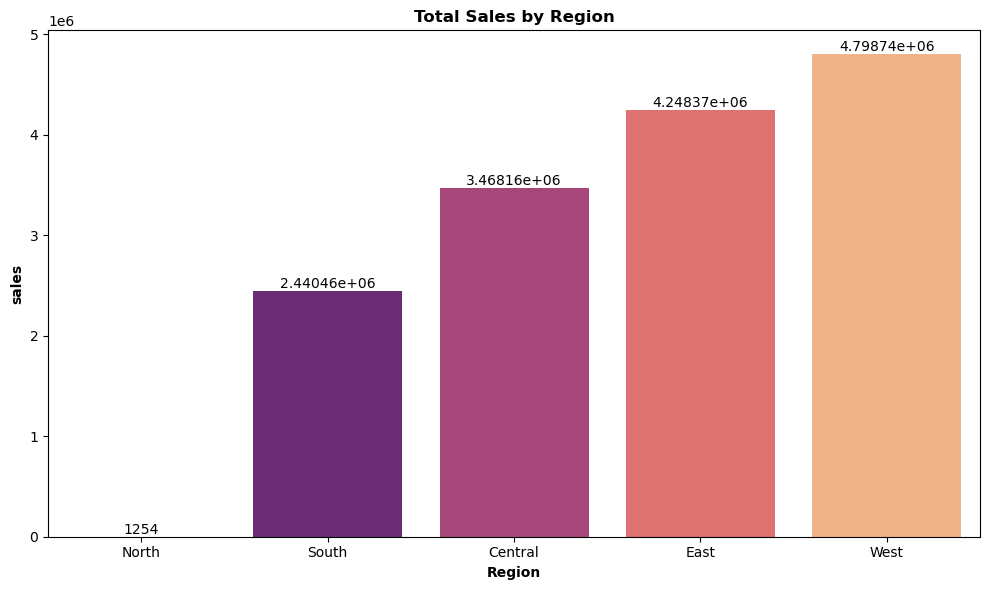

In [76]:
Sales_region = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending = True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='Sales', data=Sales_region, palette='magma')  # Change 'palette' to the desired one
plt.title('Total Sales by Region', fontweight='bold')
plt.xlabel('Region', fontweight='bold', fontsize=10)
plt.ylabel('sales', fontweight='bold', fontsize=10)

ax.bar_label(ax.containers[0], label_type='edge')  # Adds labels to bars

plt.tight_layout()
plt.show()

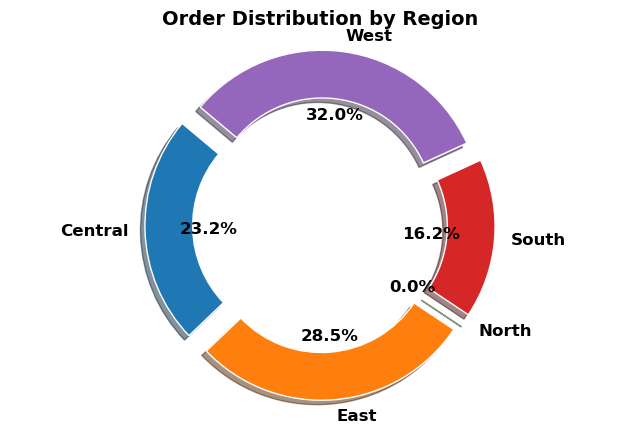

In [62]:
Sale_region = df.groupby('Region')['Order ID'].count().reset_index()
Sale_region.rename(columns={'Order ID': 'Order Count'}, inplace=True)


colors = sns.color_palette('tab10', len(Sale_region))
explode = [0.1] * len(Sale_region)

plt.figure(figsize=(8, 5))
plt.pie(
    Sale_region['Order Count'], 
    labels=Sale_region['Region'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    textprops={'fontweight': 'bold', 'fontsize': 12}
)

plt.title('Order Distribution by Region', fontweight='bold', fontsize=14)
plt.axis('equal')

plt.show()


# 3 total Profit by Category

In [63]:
Profit_by_category = pd.pivot_table(data = df, index = 'Category', values = ['Profit'],
                                   aggfunc = {'Profit':'sum'}).reset_index().sort_values(by='Profit', ascending=False)
Profit_by_category

,Category,Profit
6,Snacks,568178.85
2,"Eggs, Meat & Fish",567357.22
4,Fruits & Veggies,530400.38
3,Food Grains,529162.64
0,Bakery,528521.06
1,Beverages,525605.76
5,Oil & Masala,497895.29


# 4 Total Profit by Region

In [64]:
Profit_by_Region = pd.pivot_table(data=df, index = 'Region', values = ['Profit'],
                                 aggfunc = {'Profit':'sum'}).reset_index().sort_values(by='Profit', ascending=False)
Profit_by_Region

,Region,Profit
4,West,1192004.61
1,East,1074345.58
0,Central,856806.84
3,South,623562.89
2,North,401.28


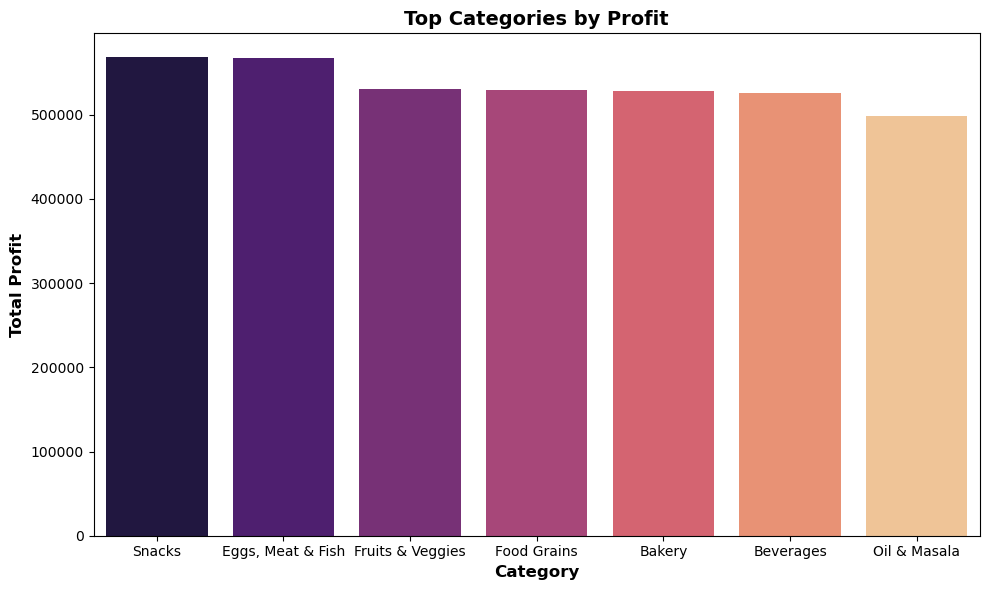

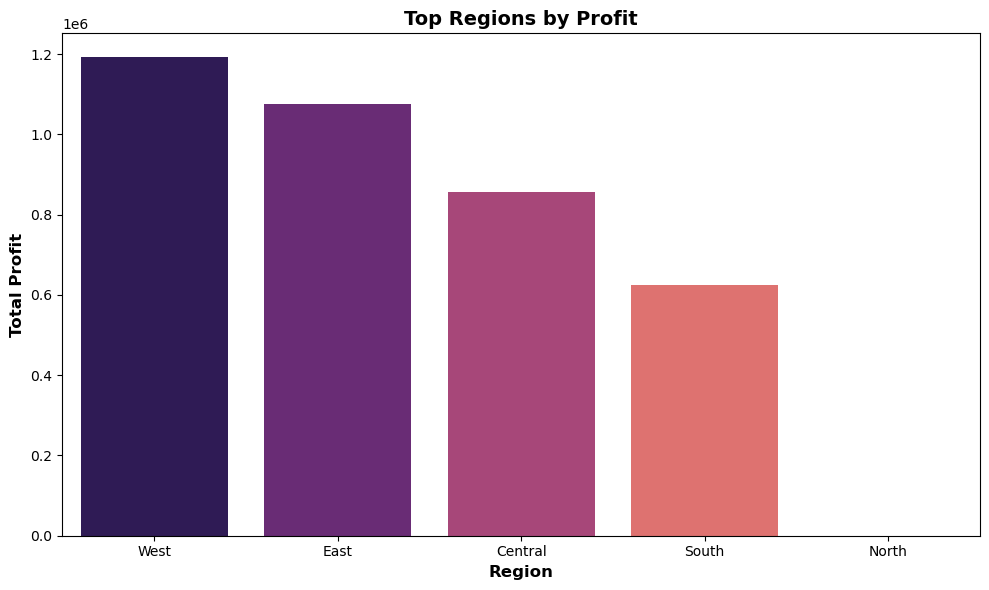

In [68]:
# Calculate category profit
category_profit = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Plotting the top categories by profit
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Profit', data=category_profit, palette='magma')

plt.title('Top Categories by Profit', fontweight="bold", fontsize=14)
plt.xlabel('Category', fontweight='bold', fontsize=12)
plt.ylabel('Total Profit', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate region profit
region_profit = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Plotting the top regions by profit
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='Profit', data=region_profit, palette='magma')  # Corrected data variable

plt.title('Top Regions by Profit', fontweight="bold", fontsize=14)
plt.xlabel('Region', fontweight='bold', fontsize=12)
plt.ylabel('Total Profit', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


# 5 Total Sales by Cities

In [70]:
Sales_by_Cities = pd.pivot_table(data=df,index='City',values=['Sales'],
                                aggfunc = {'Sales': 'sum'}).reset_index().sort_values(by='Sales', ascending=False)
Sales_by_Cities

,City,Sales
6,Kanyakumari,706764
21,Vellore,676550
0,Bodi,667177
19,Tirunelveli,659812
13,Perambalur,659738
16,Salem,657093
14,Pudukottai,653179
17,Tenkasi,643652
7,Karur,642273
8,Krishnagiri,637273


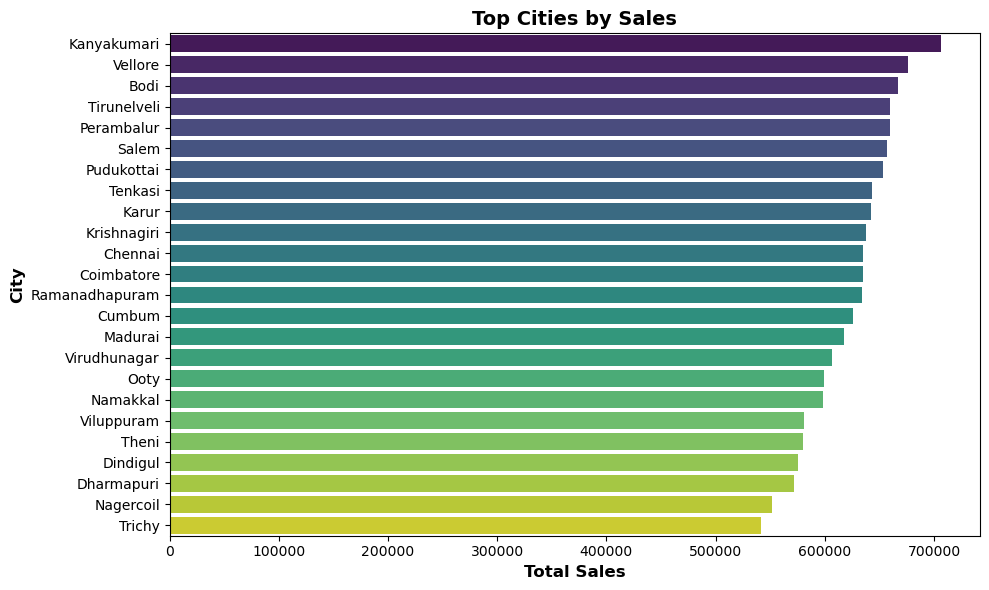

In [75]:
# Top-performing cities by Sales

Sales_by_Cities = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plotting the top cities by sales
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", len(Sales_by_Cities))
ax = sns.barplot(x='Sales', y='City', data=Sales_by_Cities, palette=palette)  # Corrected variable name

plt.title('Top Cities by Sales', fontweight='bold', fontsize=14)
plt.xlabel('Total Sales', fontweight='bold', fontsize=12)  # Fixed typo
plt.ylabel('City', fontweight='bold', fontsize=12)  # Fixed typo

plt.tight_layout()
plt.show()

In [77]:
df.to_csv('cleaned_Supermarket_sales_for_dashboard.csv', index=False)